# PHYS270 Assigmment 5: Numerical Optimization
Student name: Begantsova Milana



---
##Abstract
In this programming assignment, we are going to solve optimization problem, namely, we will analyse probability density function and try to approximate its maximum. At first, we will display a counterplot to analyze the behaviour of a function and determine reasonable range for $x$ and $y$. Based on our qualitive analysis, I will choose a reasonable approach of calculating the approximation. Then using our approximation with python library function I will get even better approximation. The quality of approximation will be judged based upon the gradient at this point.

---
##Introduction
Optimization problems frequently occur almost in every sphere of our life. People prefer to express processes through theoretical functions, and then try to maximize or minimize dependent variables. This is useful when we want to maximize income and minimize costs in economy. Or when we want... There are many approaches to solving such problems. Among them there are random search and steepest ascent method. 

In this experiment, we will work with a probability density function of particle's position. Our goal is to find such pair of $(x,y)$ that the function will be maximum at this point. Our function is dependent only on two variables, so it is possible to visualize it using matplotlib library. This visualization will be helpful in determining ranges of $x, y$ at which our answer is situated. However, neither random search method or steepest ascent methods cannot provide us an accurate answer for problem. So, I will use this approximation as innitial guess in optimization with function from python library. In each part, I will also add visualization of how our functions is approaching the maximum with changing $(x,y)$ values.

At the end of the experiment, I will judge the accuracy of approximated value by calculating of the gradient, as partial derivatives of a function at extremum point should equal to 0. Our goal is to achief at least $10^{-7} $ error.

---
##Methods
At first part of the experiment, we will need to define a function $p(x,y)$ that will return value of probability density at a particular point. All of the compuations will be done using numpy arrays, as they support vectorization (as a result they are fast). All numbers will be stored with np.longdoulbr datatype (precision=15), which has greater precision than standart np.float. For all visualizations I will use matpltlib, as it is able to plot counter maps, 3d surfaces and standart 2d graphs.

In the second part of the experiment I should choose between Random Search and Steepest ascent methods. To decide what method is more convinient in solving this problem, we should look at alghorithm at first.


###Steepest ascent method
This is an iterative method that updates values of $(x,y)$ in the next way [1]:
$$x_i = x_{i-1}+\frac{\partial f}{\partial x}h^*$$
$$y_i = y_{i-1}+\frac{\partial f}{\partial y}h^*$$
Where $x_{i-1}, y_{x-i}$ and partial derivatives are functions, so our function $f(x,y)$ can be expressed as $g(h)$.
So, from multi-dimensional problem we can go to one demensional optimization problem. Our goal will be to calculate such $h^*$, so that $g(h)$ will be maximum. The maximum of $g(h)$ can be found using, for example, golden section method. We will update our values for $x_i$ and $y_i$ until the partial derivatives will fade.
<center>
<img src="https://lh3.googleusercontent.com/proxy/9c1T6rarqyPKno6ieW5MsBIcetyb2igNVxcEuEva1UW-zZAiCP-6GZX4PK_AwFn66YlRO4o1mvVAqN-ZXtC5Bx-m18gfTKnm_84KZ85R_iDZ" width="350">
<p>Figure 1 – Example convergence of steepest ascent method</p>
</center>

This method is very fast, but unstable. It requires innitial guess, which may affect the possibility of convergence. As, we will see later on, it is not suitable for our problem as our function has many local maximas. The steepest ascent method may fail to converge to global one. Or it may not converge at all and oscillate between local maximas. Also, for better approximation, it requires deriving analytical formulas for partial derivatives. In case of our function, it will be a comprehensive task and computationally costly.

In summary, such method will require deriving analytical formulas for derivatives. Realization of two alghorithm: steepest ascent method and method to solve one-dimension oprimization problem. Even after realization it still may fail to converge to global maximum.

###Random search method
Intuitevely, this method is much easier, but slow.

It is also an iterative method that updates values for $(x,y)$ in a next way [1]:

$$x = x_l + (x_u-x_l)k$$
$$y = y_l + (y_u-y_l)r$$
Where $k$ and $r$ are random float numbers. And other constant are ranges of possible values of $x$ and $y$ such that $x\in[x_l, x_u]$, $y\in[y_l, y_u]$.

But the values are updated only in case of
$$p(x,y)>p_{max}$$
$$x_{max}, y_{max} = x, y$$
Where $p_{max}$ is previously founded maximum point.
The advantage of this method is stability. It will always converge to the maximum point at a defined range of values, but it's accuracy depends on number of iterations. That is why the alghoritm is slow. The eror of approximation decreases as:
$$\varepsilon=\frac{1}{\sqrt{N}}$$
Where N is number of iterations. 
It is great choice for complex functions with many local minimums and maximums, as it is not dependent on the gradient of a function. As a result, it will not oscillate in such functions in a way steepest ascent method may do.

###Python library function
Based on advantages and disadvantages of steepest ascent and random search method, I have decided to use a stochastic alghoritm to define a maximum of a function. I will use `scipy.optimize` function, `basinhopping` alghorithm. This alghoritm is similar to random search method, but it is more "clever" in a way it not only randomly choosing a point, but also uses a local minimization/maximization. It is usually used to find a local minimum, but we can pass to it our function with negative sign. As parameters, we should provide function with innitial guess, number of iterations, seed (optional), callback function (optional), method(optional). I decided to choose seed=10 just to ensure that function will always return the same result. The callback functions help to store intermediate values of an approximation. 

As initial guess for the function, I will provide it with approximation from previous part and try to get more accurate values. The accuracy will be judged as absolute error between gradinet at a point and real gradient at a maximum point.



---
##Description

###Innitial settings
Import all needed libaries:

In [1]:
#used for computations
import numpy as np 

import numpy.random as rand

#used for 3d and 2d visualizations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#to display graphs correctly
%matplotlib inline

I will set seed of pseudo random generator to 20, just to always get the same resulta with random search method (we can choose any value we want)

In [2]:
rand.seed(20)

In [3]:
np.finfo(np.float128).precision

18

###Part A – Problem definition and graphical visualization
Suppose that we have three quantum gaussian wavepackets that move in different directions and interfere with each other in a 2D space. And at some moment we can calculate their total wave function using next formula:

$$\psi(x,y) = \exp[-\gamma ((x-a_{1})^2+(y-b_{1})^2) + i (k_{1x} x + k_{1y}y)]+\exp[-\gamma ((x-a_{2})^2+(y-b_{2})^2) + i (k_{2x} x + k_{2y}y)] + \exp[-\gamma ((x-a_{3})^2+(y-b_{3})^2) + i (k_{3x} x + k_{3y}y)],$$
Where we have constants equal to:<br> 
$\gamma=1/25$, <br> 
$k_{1x}=5$, $k_{1y}=0$, <br> 
$k_{2x}=0$, $k_{2y}=5$, <br> 
$k_{3x}=3$, $k_{3y}=-4$, <br> 
$a_1=-5$, $b_1=0$, <br> 
$a_2=4$, $b_2=4$, <br> 
$a_3=0$, $b_3=-5$.


The result of this function is a complex number. But we are interested not in total wave function, but at their the most probable position, that can be calculated using following formula:
$$p(x,y)=|\psi(x,y)|^2$$
The result of $p(x,y)$ is a real function.

In [4]:
  #initialize all needed coefficient as np.float128 numbers
  a = np.array([-5, 4, 0], dtype=np.float128)
  b = np.array([0, 4, -5], dtype=np.float128)
  k_x = np.array([5, 0, 3], dtype=np.float128)
  k_y = np.array([0, 5, -4], dtype=np.float128)
  gamma = np.float128(1/25)

If we attentively look at the function $\psi(x,y)$, we will notice that this is a sum of exponents with similar degrees (the only thing that change: $a$, $b$ and $k$ constants).

In [5]:
def psi(x, y, graph=False):
  #to plot 3d graphs we will need a ranges for x, y values and all posible pairs of x, y
  #so z will have XxY dimension
  if(graph):
    z=np.zeros((len(x),len(y)), dtype=np.complex256)
  else:
    #sometimes we will need to compute z, when x, y are numpy arrays
    try:
      z=np.zeros(x.shape, dtype=np.complex256)
    #sometimes we work only with one point. point does not have a shape
    except:
      z=np.complex256(0)
  #calculation of 𝜓(x,y)
  for a_i, b_i, k_x_i, k_y_i in zip(a, b, k_x, k_y):
      z+= np.exp(-gamma*((x-a_i)**2+(y-b_i)**2)+1j*(k_x_i*x+k_y_i*y))
  return z


Lets check if the result of a function is a complex number:

In [6]:
psi(1,1)

(0.3256385808217775141-0.8765963690302232535j)

Now lets define a function that we will approximate, that returns real result:

In [7]:
def p_func(x, y, graph=False):
  #formula for p(x,y)
  return abs(psi(x, y, graph))**2

The result of function is indeed real, so everything seems to work fine:

In [8]:
p_func(1,1), np.dtype(p_func(1,1))

(0.8744616795165926759, dtype('float128'))

Now using this function we will plot a counter map of $p(x,y)$. 

In [9]:
#the more n, the smoother will be graph
n=1000

In [10]:
#in our case we will have n^2 points
x = np.linspace(-10, 10, n)
y = np.linspace(-10, 10, n)
X, Y = np.meshgrid(x, y)
Z = p_func(X, Y, graph=True)

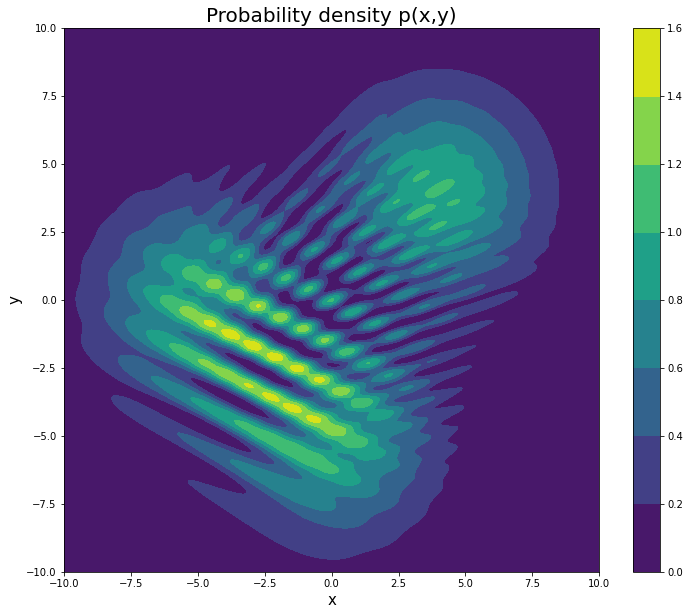

In [11]:
def show_countour(X, Y, Z):
  fig, ax = plt.subplots(figsize=(12, 10))
  
  cp = ax.contourf(X, Y, Z)
  fig.colorbar(cp) # Add a colorbar to a plot
  
  #graph settings
  ax.set_title('Probability density p(x,y)',fontsize=20)
  ax.set_xlabel('x',  fontsize=15)
  ax.set_ylabel('y',  fontsize=15)
  
  return ax

show_countour(X, Y, Z)
plt.show()

As we can see function p(x,y) has many local maximum and minimums. It is very non-linear and it will be difficult for steepest ascent to converge. So, the choice of random search method is justified, as it has been discussed in "Methods" section.

According to counter map, the yellow areas indicate the local maximums. We cannot be sure at which particular yellow area global maximum is situated as the precision of color bar is only 0.2. So, if we want to observe each area on existance of global maximum, we should choose such ranges that they will cover all of these areas. It was decided to set $x\in(-6, 2)$, $y\in(-6, 2)$:

In [12]:
x_l = np.float128(-6)
x_u = np.float128(2)
y_l = np.float128(-6)
y_u = np.float128(2)

###Part B – Realization of Random search method

In the "Methods" section, I said that the accuracy of Random search method's approximation depends on number of iterations. Our goal is not to identify the most accurate solution, but to find good enough innitial guess that we will use in approximation with python libary.

In [13]:
max_iter = 1000

Let me remind you pseudo code for for random search from "Methods section":

```
for i=1 to max_iter
    x = x_l + (x_u-x_l)k
    y = y_l + (y_u-y_l)r
    if p(x,y)>p_{max}
        x_{max}, y_{max} = x, y
    endif
endfor
```

Where k and r are randomly generated numbers, max_iter is number of iterations.




In [14]:
def random_search(x_l, x_u, y_l, y_u, max_iter):
  #choose any innitial quess in defined range
  x_old = rand.uniform(x_l, x_u)
  y_old = rand.uniform(y_l, y_u)

  #i will save intermediate results to data_graph
  data_graph = {'iter':[], 'p':[], 'x':[], 'y':[]}

  for i in range(max_iter):
      
      z_old = p_func(x_old, y_old)
      
      #compute new approximation
      x_new = x_l + (x_u-x_l)*rand.random()
      y_new = y_l + (y_u-y_l)*rand.random()

      z_new = p_func(x_new, y_new)
      
      #if it is better then previous approximation, update values of x, y
      if z_new > z_old :
          x_old = x_new
          y_old = y_new
      
          #add intermediate results
          data_graph['iter'].append(i)
          data_graph['p'].append(z_new)
          data_graph['x'].append(x_old)
          data_graph['y'].append(y_old)
          print(f"After {i} iterations: x = {x_old}, y = {y_old}, max p(x, y) = {z_new}")
  
  print(f"Result x = {x_old}, y = {y_old} at {data_graph['iter'][-1]} iterations")
  return x_old, y_old, data_graph

Now lets call a function and store everything to variables with prefix 'rand' to distinguish its result:

In [15]:
x_rand, y_rand, data_rand = random_search(x_l, x_u, y_l, y_u, n)

After 1 iterations: x = -5.712883315065174, y = -0.4659393459289287, max p(x, y) = 1.142765660375834
After 2 iterations: x = -2.970552463956735, y = -1.851912436415355, max p(x, y) = 1.3120401351098547
After 3 iterations: x = -0.7363882755294959, y = -4.4491982569364135, max p(x, y) = 1.4243794740264013
After 13 iterations: x = -2.311684829660554, y = -2.0164794135415587, max p(x, y) = 1.459459361543879
After 38 iterations: x = -3.8536749305991753, y = -1.137863364653704, max p(x, y) = 1.4596110240075113
After 141 iterations: x = -3.5939920138175028, y = -1.2626617091399197, max p(x, y) = 1.4827535251348904
After 241 iterations: x = -3.7582248616973333, y = -1.3036620696755943, max p(x, y) = 1.5173861852551556
After 871 iterations: x = -1.9931303681269235, y = -2.1055613769305843, max p(x, y) = 1.53134755112617
Result x = -1.9931303681269235, y = -2.1055613769305843 at 871 iterations


Now, lets observe how random search method converged to its solution. To do it, I will plot a graph of approximated $max(p(x,y))$, $x, y$ versus number of iterations. I will do the same procedure in Part C, so I need a function `graph()`:



In [16]:
#to function work properly, it should recieve a dictionary with x, y, p and number of iterations
#name – is a title of a graph

def graph(data, name, log_scale=False):
  fig, ax = plt.subplots(2, figsize=(12, 10))

  #setting for two graphs
  fig.suptitle(name, fontsize=20)
  ax[0].set_title("max p(x,y) versus number of iterations", fontsize=18)
  ax[1].set_title("x, y versus number of iterations", fontsize=18)
  ax[0].set_xlabel('n, iterations',  fontsize=15)
  ax[0].set_ylabel('max p(x,y)',  fontsize=15)
  ax[1].set_xlabel('n, iterations',  fontsize=15)
  ax[1].set_ylabel('x, y',  fontsize=15)
  ax[0].set_label( "p(x,y)") 
  ax[1].set_label(["x", "y"])
  ax[0].set_xscale('log')
  ax[1].set_xscale('log')
  
  #plot graph of p(x,y) versus number of iterations
  ax[0].plot(data['iter'], data['p'], label="p(x,y)")
  
  #plot graphs of x vs iter, y vs iter
  ax[1].plot(data['iter'], data['x'], label="x")
  ax[1].plot(data['iter'], data['y'], label="y")

  if (log_scale): ax[0].set_yscale('log')
  
  #for better visualization
  ax[0].grid()
  ax[1].grid()
  
  ax[0].legend()
  ax[1].legend()
  
  #add spacing between graphs
  plt.subplots_adjust(hspace=0.3)

  plt.show()

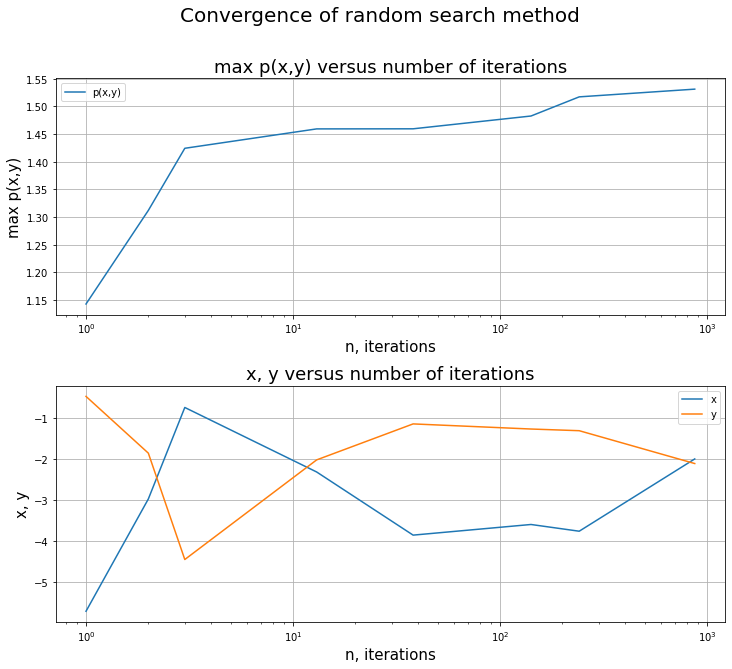

In [17]:
graph(data_rand, "Convergence of random search method")

In [18]:
print(f"The maximum identified with random search method is p({x_rand}, {y_rand}) = {p_func(x_rand, y_rand)}")

The maximum identified with random search method is p(-1.9931303681269235, -2.1055613769305843) = 1.53134755112617


In the "Methods" section, I have said that I will evaluate the accuracy of the result by calculating partial derivaties of a function. The formulas for approximate partial derivatives [2]:

$$\frac{\partial f}{\partial x} = \lim_{h\to 0}\frac{f(x+h,y)-f(x,y)}{h}$$

$$\frac{\partial f}{\partial y} = \lim_{h\to 0}\frac{f(x,y+h)-f(x,y)}{h}$$
The closer h will be to 0, the better approximation we will compute. I will set $h=10^{-8}$ as it is the smallest number that we can choose with our precision otherwise function can just return 0. We cannot be sure in this result.


In [19]:
def gradient(x, y, h = 1e-11):
  dx = (p_func(x+h,y)-p_func(x,y))/h
  dy = (p_func(x,y+h)-p_func(x,y))/h
  return dx, dy

From Calculus III classes we know that the extremum appears at a point at which $\nabla f(x,y)=<0,0>$. So this is a vector. I will judge accuracy of a solution by absolute error of modulus ($\|\nabla f\|$), knowing that ideal equal to 0.
$$\|\nabla p(x,y)\|=\sqrt{\left(\frac{\partial p}{\partial x}\right)^2+\left(\frac{\partial p}{\partial y} \right)^2}$$

In [20]:
def absolute_error(x, y, h = 1e-11):
  dx, dy = gradient(x,y, h)
  return np.sqrt(dx**2+dy**2)

In [21]:
print(f"The approximated gradient:\n∇f({x_rand}, {y_rand}) = {gradient(x_rand, y_rand)}")
print(f"The absolute error is {absolute_error(x_rand, y_rand)}")

The approximated gradient:
∇f(-1.9931303681269235, -2.1055613769305843) = (-0.5155507531301451208, -0.0992954741867169204)
The absolute error is 0.5250258757880651


The zero gradient can appear not only at maximum point, but also at minimum and saddle points. To chech whather point is a maximum we should conduct Partial Derivatives test:
1. If $H>0$ and $\frac{\partial^2f}{\partial x^2}>0$, then it is a relative minimum
2. If $H>0$ and $\frac{\partial^2f}{\partial y^2}<0$, then it is a relative maximum
3. If $H<0$, then it is a saddle point
4. If $H=0$, then the test is inconclusive

Where $H$ is a hessian matrix that is calculated in this way:
$$H=
\begin{vmatrix}
f_{xx} & f_{xy} \\
f_{yx} & f_{yy} 
\end{vmatrix}=f_{xx}f_{yy}-f_{xy}f_{yx}$$

In [22]:
def jacobian(x, y):
  dx, dy = gradient(x,y)
  dxdx,dydy = gradient(dx,dy)
  dydx, dxdy = gradient(dy, dx)
  return dxdx*dydy-dydx*dxdy, dxdx


There is no need to conduct this test with result of random search method, since $p_x(x,y)\gg 0$ and $p_y(x,y)\gg0$.
But we will use it later on to check our approximation in Part C if it will be accurate.

###Part C – Approximation with Python library

Now we have innitial quess for x, y –`x_rand, y_rand`. They have close to 0 gradient, but still with relative error. I will use it to approximate a more accurate solution with `scipy.optimize`:



In [23]:
import scipy.optimize as spo

As I have explained in the "Methods" section there are many parameters that we should pass to function. I will remind you that I am going to use a `bassinghopping()` function from `scipy.optimize`:

In [24]:
#bassinhopping alghoritm is usually minimizes function, but I will pass it with a negative sign
f = lambda h: -p_func(h[0],h[1])

In [25]:
#i will store intermediate result to dictionary data with prefix 'max'
data_max={'x':[], 'y':[], 'p':[]}

def callback(x, f, accepted):
    x_0, y_0 = x
    data_max['x'].append(x_0)
    data_max['y'].append(y_0)
    data_max['p'].append(-f)

As we are passing as innitial values approximation of Random Search method, it will not take so many iterations for `basinhopping()` to converge, so `niter=100`

In [26]:
minimizer_kwargs = {"method": "L-BFGS-B"}
optima = spo.basinhopping(f, [x_rand, y_rand], minimizer_kwargs=minimizer_kwargs, niter=100, callback=callback, seed=20)
optima

                        fun: -1.5606897559849126362
 lowest_optimization_result:       fun: -1.5606897559849126362
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([3.76001313e-08, 4.43438689e-08])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 42
      nit: 10
   status: 0
  success: True
        x: array([-2.92909772, -1.67642256])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 3063
                        nit: 100
                          x: array([-2.92909772, -1.67642256])

In [27]:
x_max, y_max = optima.x

To see how `bassinhopping()` function maximizes the function $p(x,y)$, we at first should generate a data set:



In [28]:
x = np.linspace(-5, 3, n)
y = np.linspace(-4.5, -1.5, n)
X, Y = np.meshgrid(x, y)
Z = p_func(X, Y, graph=True)

I will plot a 3D surface of function $p(x,u)$ and add intermediate results of bassinhopping alghoritm.

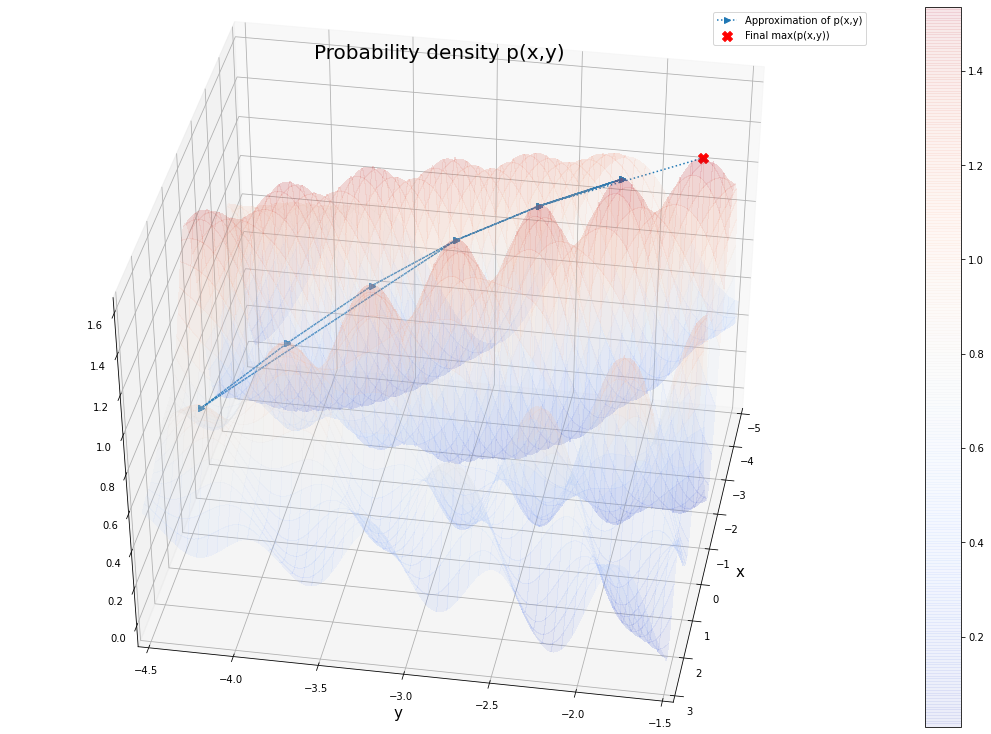

In [29]:
# Plot 3
fig = plt.figure(figsize=(15, 10))
ax = Axes3D(fig)

ax.scatter(x_max, y_max, p_func(x_max, y_max), s=100, marker = 'X', c = 'r', label="Final max(p(x,y))")
ax.plot(data_max['x'], data_max['y'], data_max['p'], marker='>', label="Approximation of p(x,y)", linestyle = ':',)
cp = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=.1)

fig.colorbar(cp) # Add a colorbar to a plot

ax.set_title('Probability density p(x,y)',fontsize=20)
ax.set_xlim(-5, 3)
ax.set_ylim(-4.5, -1.5)
ax.set_xlabel('x',  fontsize=15)
ax.set_ylabel('y',  fontsize=15)
ax.azim = 10
ax.dist = 9
ax.elev = 40


ax.legend()     
plt.show()

In [30]:
data_max['iter']=np.arange(1, len(data_max['p'])+1)

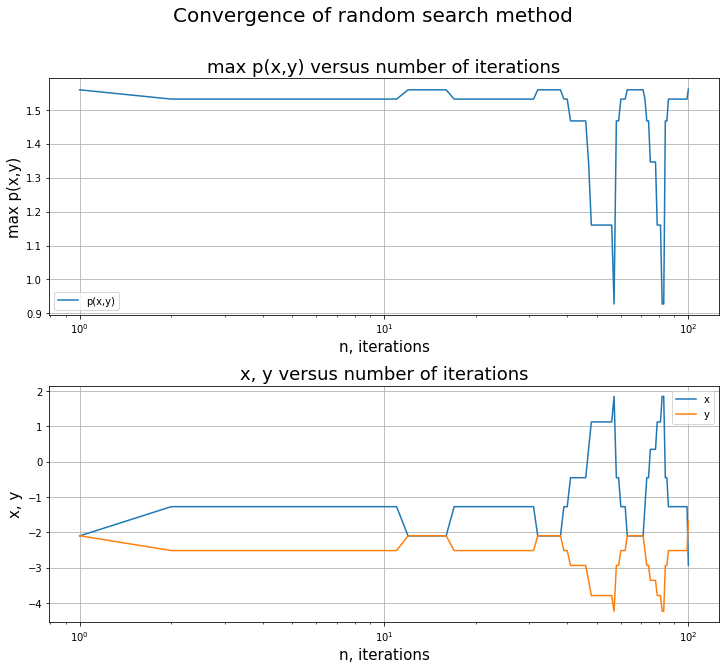

In [31]:
graph(data_max, "Convergence of random search method")

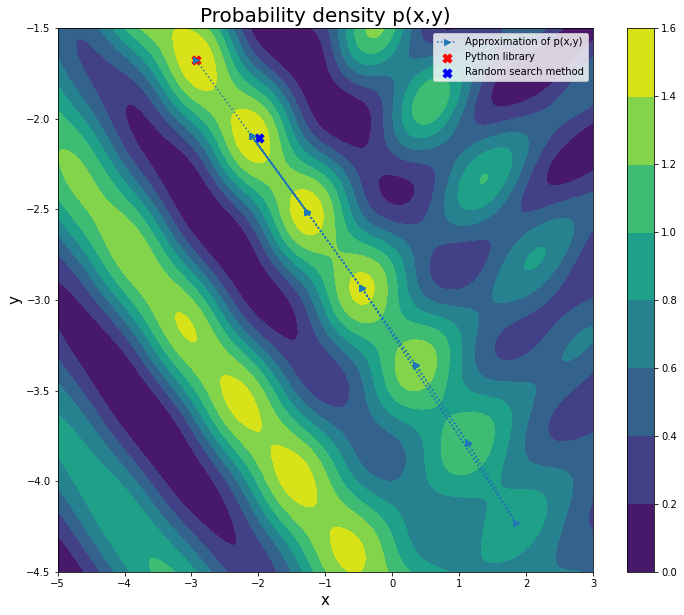

In [32]:
# Plot 5
ax = show_countour(X,Y,Z)
ax.scatter(x_max, y_max, c = 'r', s=80, marker='X', label="Python library")
ax.plot(data_max['x'], data_max['y'], marker='>', label="Approximation of p(x,y)", linestyle = ':',)
ax.scatter(x_rand, y_rand, c = 'b', s=80, marker='X', label="Random search method")
ax.legend()

plt.show()

In [33]:
print(f"p{x_max, y_max}  = {p_func(x_max, y_max)}")
print(f"The approximated gradient with h = 1e-11:\n∇f({x_max}, {y_max}) = {gradient(x_max, y_max)}")
print(f"The absolute error is {absolute_error(x_max, y_max)}")

p(-2.929097719598481, -1.676422559272926)  = 1.5606897559849127
The approximated gradient with h = 1e-11:
∇f(-2.929097719598481, -1.676422559272926) = (-2.1684043449710089992e-08, 5.421010862427522498e-08)
The absolute error is 5.838607383087712e-08


According to results of Basinhopping alghoritm at point:
$(x,y) =(-2.929097719598481, -1.676422559272926)$ 

We have $p_x(x,y)\approx0$ and $p_y(x,y)\approx 0$ with absolute error of $5.84\times10^{-8}$.

Since partial derivatives are almost equal to 0, we can conduct a partial derivative test and calculate $H$ ans $p_{xx}(x,y)$.

In [34]:
hessian, dxdx = jacobian(x_max, y_max)
print(f"H = {hessian} >0 , f_xx = {dxdx} < 0.\nSo by partial derivative test, the extremum point {x_max, y_max} is maximum.")

H = 1.5859300230075882e-07 >0 , f_xx = -0.1179643405527231 < 0.
So by partial derivative test, the extremum point (-2.929097719598481, -1.676422559272926) is maximum.


---
##Conclusion
This progaramming assignment have shown us that before try optimizating som function, we should a have at least brief understanding of function behaviour. And based on this behaviour we can choose an approach that will be the best one for our particular function. In case $p(x,y)$, it has many 'volcanoes' and 'valleys', meaning it is non-linear, unstable. Such method as Steepest ascent method may fail to converge because its close dependence on the gradients. It is also quite comprehensive to withdraw an accurate analytical formula for them. You may say that we could use approximate gradient, but it will only accumulate round-off and approximation error with each iteration. So, in case of our function we have prove that stochasting otimization method will be more efficient, for example random search method. But it is slow. It may converge to the best solution, but it may take millions of operations. </br>
With 1000 thousand iterations, at 871 iteration Random search method identified local maximum, which equals to:

$$p(x,y)=p(-1.9931303681269235, -2.1055613769305843)= 1.53134755112617$$

At this point, the calculated gradient is

$$\nabla p(x,y) = (-0.5155507531301451208, -0.0992954741867169204)$$

The absolute error of modulus of gradient at this point is $0.5250258757880651$, but our goal is to achieve the maximum accuracy.

While chosing a Python library function I was looking for a similar to random search, but more "clever" alghorithm. I used function bassinhoping from scipy.optimize libary. This function is remarkable not only for randomly choosing the point, but it also uses local minimization/maximization. For this process, I guess this function uses approximation of gradient at possible max/min to move closer to extremum. The gradient does not control the process, it is used as sanity check.

To achief better approximation I passed the result of random search method to basinhopping alghorithm as our innitial guess. The result is:

$$p(x,y)=p(-2.929097719598481, -1.676422559272926)  = 1.5606897559849127$$
At this point, the calculated gradient is
$$\nabla p(-2.929097719598481, -1.676422559272926) = (-2.1684043449710089992\times10^{-8}, 5.421010862427522498e \times10^{-8})$$

The absolute error is $5.838607383087712\times10^{-8}$
The partial derivative test confirmed that this point is local maximum.

It is obvious that our second approximation caclulated with Python library function is much more accurate. The partial derivatives are almost equal $0$ with $\approx 5.84\times10^{-8}$ fault. We achieved the accuracy required by problem definition, but is it possible to computer even more accurate value, for example error $\leqslant 10^{-12}$ and how?



The problem is that for local minimization Basinhoping alghorithm may use approximated derivatives and jacobian. Such approximation deal with substracting very close values and deviding them on very small value. As you remember I calculated approximated values for partial gradients by setting $h=10^{-11}$, ideally it should be as much close 0 as we can. But here is a problem with smaller $h$

In [35]:
new_h = 1e-12

In [36]:
# approximated gradient with a higher precision
print(f"The approximated gradient h = {new_h}:\n∇f({x_max}, {y_max}) = {gradient(x_max, y_max, new_h)}")
print(f"The absolute error is {absolute_error(x_max, y_max, new_h)}")

The approximated gradient h = 1e-12:
∇f(-2.929097719598481, -1.676422559272926) = (0.0, 0.0)
The absolute error is 0.0


The deal with  ℎ  is that when we choose  $h<10^{-11}$ , we exceed precision of np.float128 that calculate values with 18 significant figures.

In [37]:
np.finfo(np.float128).precision

18

As a result when we subtract values of $p(x,y)$ of close enough points:

In [38]:
p_func(x_max+new_h*10,y_max)-p_func(x_max,y_max)

-2.168404344971008868e-19

We get the number close to boundaries of np.float128. Then we devide it by $h$, which is again small: 

In [39]:
print(f"The approximated gradient h = {new_h}:\n∇f({x_max}, {y_max}) = {gradient(x_max, y_max, new_h)}")
print(f"The absolute error is {absolute_error(x_max, y_max, new_h)}")

The approximated gradient h = 1e-12:
∇f(-2.929097719598481, -1.676422559272926) = (0.0, 0.0)
The absolute error is 0.0


If the similar approximation is used in basinhopping method, then basinhopping cannot provide us a solution with absolute error less than $\varepsilon < 10^{-7}$ at least for np.float128.

So the main problem is rounding and round-off error which can be easily resolved by a different datatype which has compatibility and similar functions with numpy arrays, but of greater precision (np.float128 is the most accurate datatype of numpy libarary). Such datatypes exists. For example, there is mpmath library that has similar functionality and own datatype mpf. We can setup the precision of mpf up to 100 significant figures. The np.float128 stores result with 128 bit, so the values are stored with 18 significant figures.

---
###Summary

The maximum of $p(x,y) = 1.5606897559849127$, at $(x,y)=-2.929097719598481, -1.676422559272926$.
The approximate gradient at this point is $$\nabla p(x,y) = (-2.1684043449710089992\times10^{-8}, 5.421010862427522498\times10^{-8}) $$
The absolute error of modulus of gradient is:
$$\varepsilon = 5.838607383087712e-08$$
The second partial derivatives test confirmed that this extremum is maximum:

Since, $H = 1.5859300230075882\times 10^{-7} >0 , f_{xx} = -0.1179643405527231 < 0$.


#References
[1] Computational Physics Lecture 14, Multi-Dimensional Unconstrained Optimization. Retrieved from: https://www.youtube.com/watch?v=t_ecplkojYo </br>
[2] Numerical differentiation of
functions of two variables. Retrieved from: https://www.uio.no/studier/emner/matnat/math/MAT-INF1100/h07/undervisningsmateriale/kap7.pdf </br>
[3] Fredrik Johansson and others. mpmath: a Python library for arbitrary-precision floating-point arithmetic (version 0.18), December 2013. Retrieved from: http://mpmath.org/.